### 5. Read a grayscale image and perform the following operations:

        (c) Demonstrate segmentation by adaptive thresholding.

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Generate Histogram

In [14]:
def generateHistogram(image):
    histogram = np.zeros(256)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

### Adaptive Thresholding

In [15]:
def adaptive_thresholding(image, block_size = 11, C = 2):

    rows, cols = image.shape
    adaptive_thresh = np.zeros_like(image, dtype=np.uint8)

    if block_size % 2 == 0:
        block_size += 1

    half_block = block_size // 2

    for i in range(half_block, rows - half_block):
        for j in range(half_block, cols - half_block):

            neighborhood = image[i - half_block:i + half_block + 1, j - half_block:j + half_block + 1]

            mean_val = np.mean(neighborhood)

            threshold = mean_val - C

            if image[i, j] > threshold:
                adaptive_thresh[i, j] = 255
            else:
                adaptive_thresh[i, j] = 0


    return adaptive_thresh

In [16]:
image = cv.imread('img6.tif', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (512, 512))

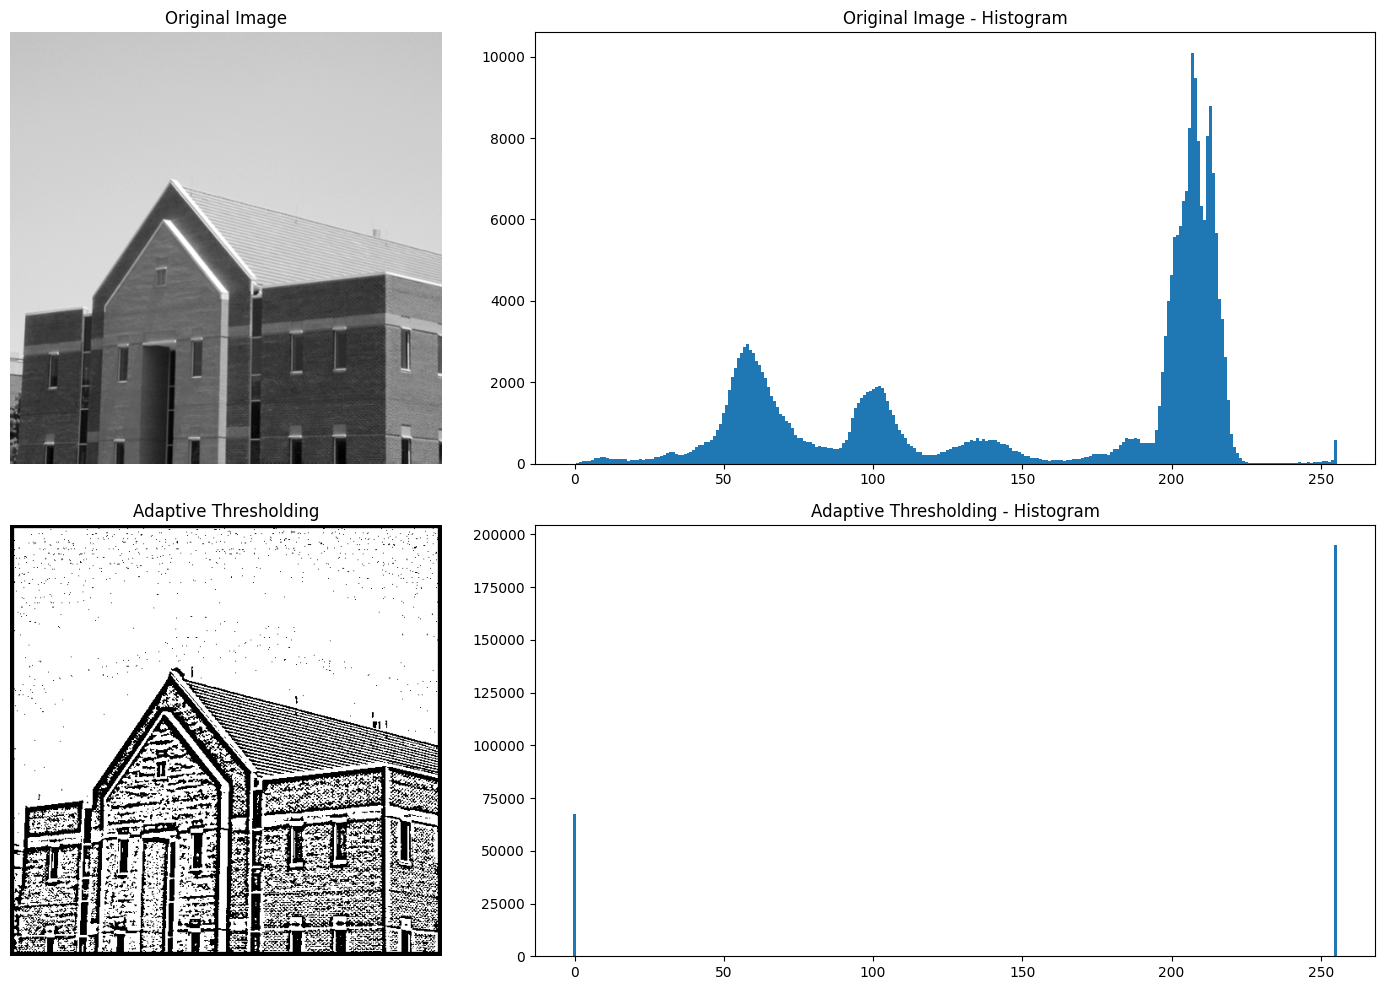

In [17]:
plt.figure(figsize=(16,10))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()

hist = generateHistogram(image)
plt.subplot(2, 2, 2)
plt.bar(range(256), hist, width=1.0)
plt.title("Original Image - Histogram")
plt.tight_layout()

adaptive_thresh = adaptive_thresholding(image)
plt.subplot(2, 2, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.tight_layout()

hist = generateHistogram(adaptive_thresh)
plt.subplot(2, 2, 4)
plt.bar(range(256), hist, width=1.0)
plt.title("Adaptive Thresholding - Histogram")
plt.tight_layout()